In [329]:
import numpy as np
import matplotlib.pyplot as plt

# Acquired Hereditary Immunity Hypothesis

Text(0.5, 1.0, '$N_t-t$')

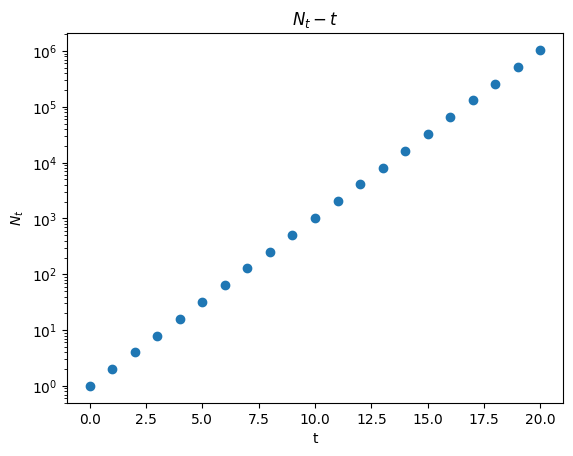

In [330]:
t = 20 #time under consideration in the unit of cell cycle
N = [1]  #the list stores the number of yeasts at time t
for i in range(t):
    temp = 2*N[i]
    N.append(temp)
plt.scatter(np.linspace(0,t,t+1),N)
plt.gca().set_yscale('log')
plt.xlabel('t')
plt.ylabel(r'$N_t$')
plt.title(r'$N_t-t$')

Text(0.5, 1.0, 'The Distribution with the mean=2.02 and var=1.69')

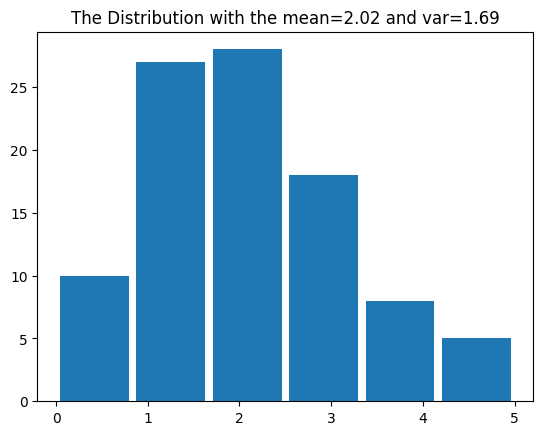

In [331]:
p = 1e-1 # the chance of a yeast to survive an attack
r = []    # each element of the list is the number of resistant yeasts in one culture
C = 96   # the number of similar cultures
for j in range(C):
    temp=0
    for i in range(len(N)):
        if np.random.rand()<p:
            temp+=1
    r.append(temp)
plt.hist(r,bins=6,rwidth=0.9)
mean,var=np.mean(r),np.var(r)
plt.title(f'The Distribution with the mean={mean:.2f} and var={var:.2f}')

# Mutation Hypothesis

In [332]:
r =[]
N = []  #the list stores the number of yeasts of several similar cultures, each element represents a culture 
a = 1e-3 #p is the chance per time unit per yeast to 
r_means=r_vars=[]
for j in range(C):
    n=[1] #for one culture start from one yeast
    for i in range(t):
        if i == 0: # at zero time, there was no resistant yeasts
            r_temp=0
            rr = [0]  
        else:
            r_temp=0
            for k in range(n[i-1]):# there will be yeasts mutate
                if np.random.rand()<a:
                    r_temp+=1
            new_resist = 2*rr[i-1]+r_temp
            rr.append(new_resist)
        temp = 2*(n[i-1]-r_temp)
        n.append(temp)
    N.append(n)
    r.append(rr)
    #r_means.append(np.mean())

0.31226446492575527

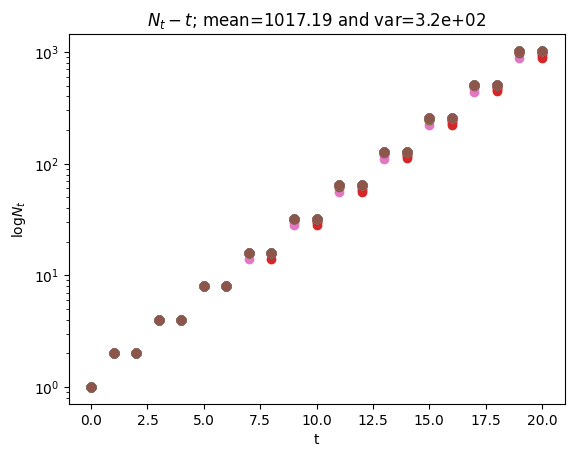

In [333]:
for i in range(C):
    plt.scatter(np.linspace(0,t,t+1),N[i])
plt.gca().set_yscale('log')
plt.xlabel('t')
plt.ylabel(r'log$N_t$')
N=np.array(N)
mean,var=np.mean(N.T[-1]),np.var(N.T[-1])
plt.title(r'$N_t-t$; '+f'mean={mean:.2f} and var={var:.2}')
var/mean

4404.358368507893

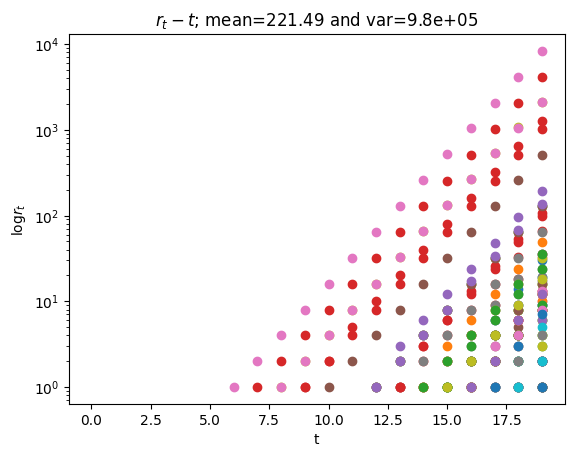

In [334]:
for i in range(C):
    plt.scatter(np.linspace(0,t-1,t),r[i])
plt.gca().set_yscale('log')
plt.xlabel('t')
plt.ylabel(r'log$r_t$')
r=np.array(r)
mean,var=np.mean(r.T[-1]),np.var(r.T[-1])
plt.title(r'$r_t-t$; '+f'mean={mean:.2f} and var={var:.2}')
var/mean

C:\Users\zyan\AppData\Local\Temp\ipykernel_25676\3990264776.py:8: RuntimeWarning: invalid value encountered in divide
  plt.semilogy(np.linspace(0,t-1,t),r_vars/r_means)


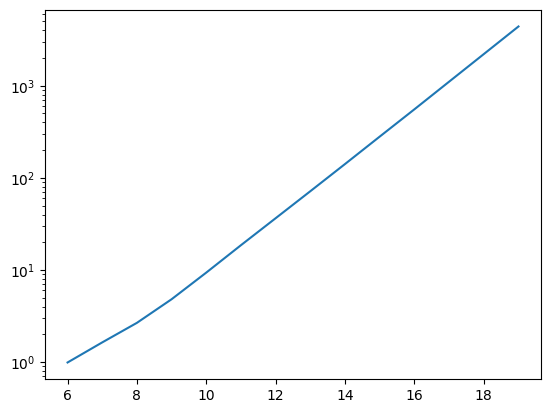

In [335]:
r_means=[]
r_vars=[]
for i in range(t):
    r_means.append(np.mean(r.T[i]))
    r_vars.append(np.var(r.T[i]))
r_means=np.array(r_means)
r_vars=np.array(r_vars)
plt.semilogy(np.linspace(0,t-1,t),r_vars/r_means)